In [106]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import cv2

In [107]:
# Define the paths for the dataset
train_dir = "E:/4_B.Tech Mega Project/Dataset/"

In [108]:
# Defining the directories for each disease class
class_directories = {
    "Alternaria_Pomegranate": "Alternaria",
    "Anthracnose_Pomegranate": "Anthracnose",
    "Bacterial_Blight_Pomegranate": "Bacterial_Blight",
    "Cercospora_Pomegranate": "Cercospora",
    "Healthy_Pomegranate": "Healthy"
}

In [109]:
# Initialize ImageDataGenerator for augmentation and data preprocessing
train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, validation_split=0.2)


In [110]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),  # Resize images to 128x128
    batch_size=32,
    class_mode='categorical',
    subset='training'  # Use 80% for training
)

Found 4080 images belonging to 5 classes.


In [111]:
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'  # Use 20% for validation
)

Found 1019 images belonging to 5 classes.


In [112]:
# Build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(5, activation='softmax')  # 10 classes (healthy + 9 disease types)
])


In [113]:

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [114]:
# Train the model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)

Epoch 1/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 240s 2s/step - accuracy: 0.5129 - loss: 1.2013 - val_accuracy: 0.8165 - val_loss: 0.4927
Epoch 2/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 244s 2s/step - accuracy: 0.8391 - loss: 0.4806 - val_accuracy: 0.8528 - val_loss: 0.4308
Epoch 3/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.8909 - loss: 0.3316 - val_accuracy: 0.8224 - val_loss: 0.5101
Epoch 4/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.8767 - loss: 0.3811 - val_accuracy: 0.8960 - val_loss: 0.2694
Epoch 5/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 246s 2s/step - accuracy: 0.9229 - loss: 0.2353 - val_accuracy: 0.8891 - val_loss: 0.3263
Epoch 6/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 245s 2s/step - accuracy: 0.9226 - loss: 0.2388 - val_accuracy: 0.9028 - val_loss: 0.2611
Epoch 7/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9287 - loss: 0.2346 - val_accuracy: 0.9235 - val_loss: 0.2375
Epoch 8/10
128/128 ━━━━━━━━━━━━━━━━━━━━ 241s 2s/step - accuracy: 0.9347 - loss: 0.1988 - val_accu

In [115]:
# Save the trained model
model.save("Pomegranate_disease_model_final_last.h5")


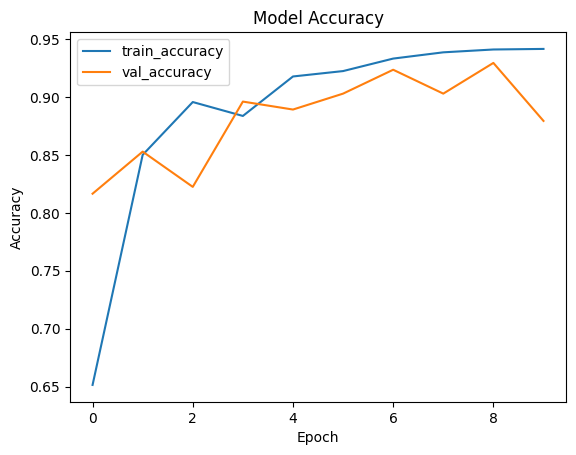

In [116]:

# Plot training accuracy and loss
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()


In [135]:
# Function to predict the disease from an image
def predict_disease(img_path, model, class_labels):
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0  # Normalize the image
    
    predictions = model.predict(img_array)
    max_index = np.argmax(predictions)
    confidence = np.max(predictions)

    if confidence > 0.6:  # Set a threshold to handle unrecognized cases
        return class_labels[max_index]
    else:
        return "Disease cannot be recognized due to low confidence"

# Example usage: Testing the model on new images
class_labels = list(class_directories.keys())
model = tf.keras.models.load_model("Pomegranate_disease_model_final_last.h5")

# Load a test image (Replace with the path of the test image)
test_image_path = r"E:\4_B.Tech Mega Project\Dataset\an2.jpg"

# Predict disease
predicted_disease = predict_disease(test_image_path, model, class_labels)
print(f"Predicted Disease: {predicted_disease}")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
Predicted Disease: Disease cannot be recognized due to low confidence
